Total Stiffness Matrix 2:
 [[ 1.244000e+03  1.867000e+03 -1.244000e+03  1.867000e+03  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 1.867000e+03  3.733000e+03 -1.867000e+03  1.867000e+03  0.000000e+00
   0.000000e+00  0.000000e+00]
 [-1.244000e+03 -1.867000e+03  2.488000e+03  0.000000e+00 -1.244000e+03
   1.867000e+03  0.000000e+00]
 [ 1.867000e+03  1.867000e+03  0.000000e+00  7.466000e+03 -1.867000e+03
   1.867000e+03  0.000000e+00]
 [ 0.000000e+00  0.000000e+00 -1.244000e+03 -1.867000e+03  5.001244e+06
  -1.867000e+03 -5.000000e+06]
 [ 0.000000e+00  0.000000e+00  1.867000e+03  1.867000e+03 -1.867000e+03
   3.733000e+03  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e+06
   0.000000e+00  5.000000e+06]]
[[2488.    0. 1867.]
 [   0. 7466. 1867.]
 [1867. 1867. 3733.]]
Displacement:
 [[ 0.        ]
 [ 0.        ]
 [-0.00703841]
 [-0.0010061 ]
 [ 0.        ]
 [ 0.00402333]
 [ 0.        ]]
Reactions:
 [[ 6.87738815e+00]
 [ 1.12623178e+01]
 [-1.00000000e+0

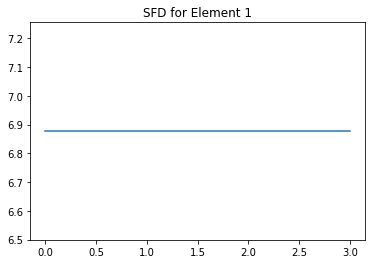

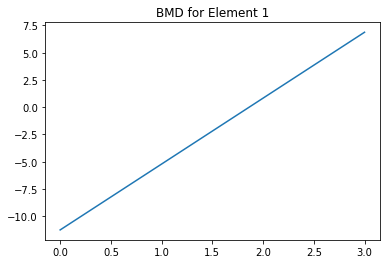

SF and BM for element 2: 
 [[-3.12261185e+00]
 [-9.38492961e+00]
 [ 3.12261185e+00]
 [-1.77635684e-15]]


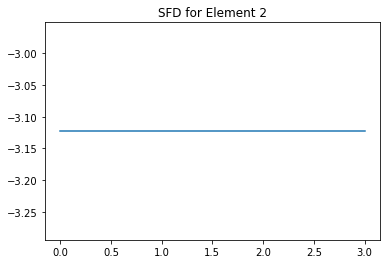

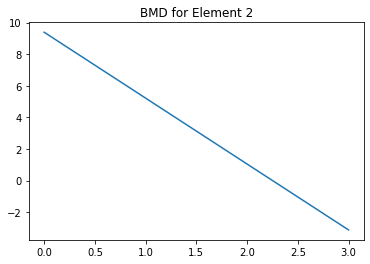

In [1]:
import numpy as np
import matplotlib.pyplot as plt

E=70000000
I=40*10**-6
k=5*10**6
P=10
L=[3,3]
number_of_nodes = 3
u = [0,0,1,1,0,1,0]
F = np.array([-P,0,0]).reshape((3,1))

total_stiffness_matrix = np.zeros((2*number_of_nodes,2*number_of_nodes))
k_matrix={}
for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  total_stiffness_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]
# convert TSM to 7x7
row_to_add = np.array([0,0,0,0,0,0])
col_to_add = np.array([0,0,0,0,0,0,0])
total_stiffness_matrix = np.vstack((total_stiffness_matrix, row_to_add))
total_stiffness_matrix = np.hstack((total_stiffness_matrix, np.atleast_2d(col_to_add).T))
# Spring Matrix
k_spring = np.array([k,-k,-k,k]).reshape((2,2))
#print(k_spring)
#print("Total Stiffness Matrix:\n",total_stiffness_matrix)
total_stiffness_matrix[4,4] += k_spring[0,0]
total_stiffness_matrix[4,6] += k_spring[0,1]
total_stiffness_matrix[6,4] += k_spring[1,0]
total_stiffness_matrix[6,6] += k_spring[1,1]
print("Total Stiffness Matrix 2:\n",total_stiffness_matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*number_of_nodes+1):
  for j in range(2*number_of_nodes+1):
    if u[i]*u[j] == 1:
      reduced_m.append(total_stiffness_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))
print(reduced_m)

rotation_m = np.linalg.solve(reduced_m, F)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*number_of_nodes+1,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(total_stiffness_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  print('SF and BM for element ' + str(i+1) +': \n', force_mat)
  #xValue=[0,L[i]]
  #yValue=[force_mat[0],force_mat[0]]
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.show()